# Lutte contre la criminalité organisée Algorithme de détection de faux billets

*Etude data - Projet 6 - Nalron (décembre 2019) / ENSAE-ENSAI Formation Continue*

*Data source* [Office central pour la répression du faux monnayage](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/notes.csv)

---

## Analyse en composantes principales de l'échantillon, en suivant les étapes ci-dessous

- Analyse de l'éboulis des valeurs propres,
- Représentation des variables par le cercle des corrélations,
- Représentation des individus par les plans factoriels,
- Analyse de la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, il est nécessaire d'apporter une interprétation des résultats obtenus.</p>*La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.*

In [20]:
#Préparation du jeu de données pour l'ACP
df = data.copy()
df.index = df['is_genuine']
del df['is_genuine']

In [21]:
#Transformation des données en array Numpy
X = df.values

In [22]:
#Centrage/réduction des données (éviter les écarts d'échelle, les données prendront toutes la même importance)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

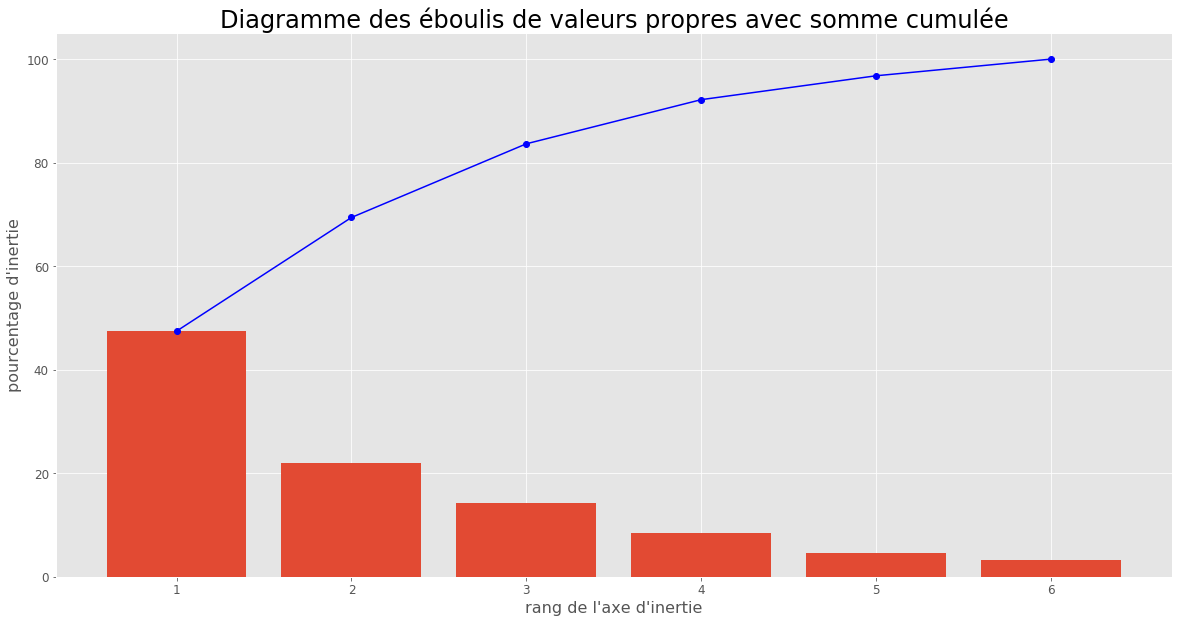

In [23]:
#Représentation de la variance expliquée: Diagramme des éboulis de valeurs propres avec somme cumulée
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.figure(figsize(20,10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée")

plt.savefig("p6_graphic/eboulis_valeurs_propres.png")
plt.show()

*La méthode du coude précise une représentation satisfaisante de nos variables <strong>sur les deux premières composantes principales, le premier axe factoriel</strong>.*

In [24]:
#Calcul des composantes principales sur les deux premières
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.47447921 0.69405027]


<strong>69% de la variance</strong> des données est expliquée par les deux premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel.

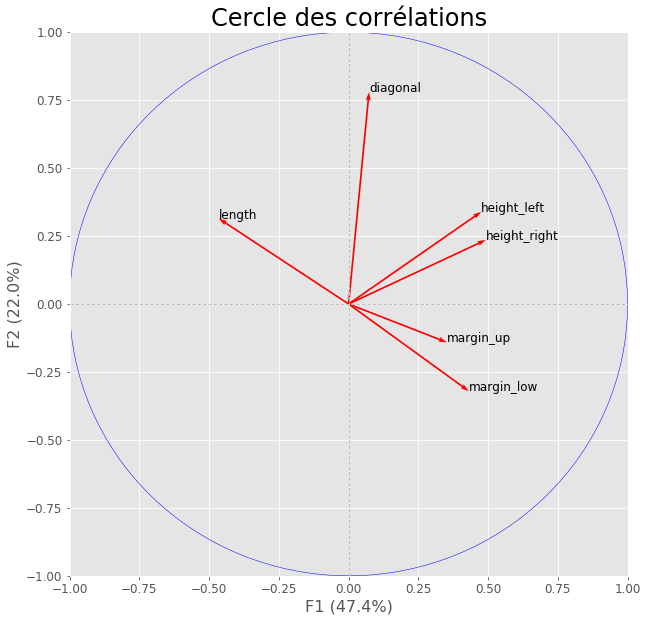

In [26]:
#Cercle des corrélations des variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("p6_graphic/cercle_correlation.png")
plt.show()

*A partir de cette représentation graphique, nous pouvons déterminer les variables qui se révélent être les plus corrélées aux composantes F1 et F2. Notons également que la longueur des flèches est importante, une variable dont la longueur de la flèche est proche de 1 sera extrêmement bien représentée...*</p>*Voir plus bas pour la suite de l'interprétation.*

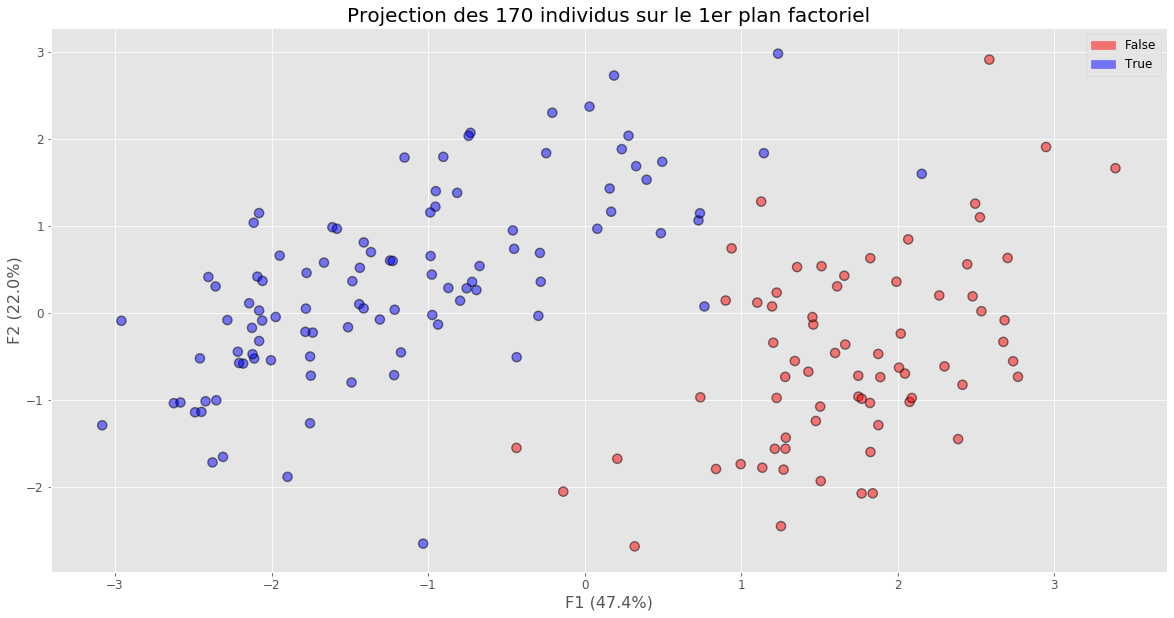

In [27]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))

#Projection des indivifus par scatter Plot sur le premier plan factoriel
colors = ['red', 'blue']
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

#Labels de la nature des billets
lab_0 = mpatches.Patch(color='red', alpha=0.5, label='False')
lab_1 = mpatches.Patch(color='blue', alpha=0.5, label='True')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=16)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=16)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=20)

plt.savefig("p6_graphic/projection_pca.png")
plt.show()

In [28]:
#Coefficients de la composante principale F1
F1 = pca.components_[0]
print(F1) 
#Coefficients de la composante principale F2
F2 = pca.components_[1]
print(F2)

[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
[ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]


*Le premier plan factoriel est de loin le plus représentatif pour pouvoir effectuer une projection des variables et des individus, les autres composantes principales n'ont pas besoin d'être traitées.*

**Interprétation des projections réalisées : \
F1 : représente la longueur du billet / hauteur ainsi que la marge \
F2 : représente la longueur de la diagonale**

- L'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie. Sur la plupart des observations F1 permet l'identification des billets. Concernant les valeurs proches de zéro, c'est F2 qui permet de discriminer.

- Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.
- On voit qu'une diagonale sépare clairement les vrais et les faux billets.

In [29]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue

df_facto = pd.DataFrame(X_projected, index=data.index, columns=["F" + str(i+1) for i in range(2)]).iloc[:, :2]
df_facto

,F1,F2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105
4,-2.403180,0.412170
...,...,...
165,2.478626,0.189974
166,2.585331,2.914472
167,2.067245,0.845602
168,0.739257,-0.972965


#### <span style="text-decoration:underline">Contribution des individus dans l'inertie totale:<span/>

In [30]:
#Contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'is_genuine':df.index})
ctr_indiv_inertie

,c_inertie,is_genuine
0,18.410598,True
1,5.444799,True
2,4.960527,True
3,4.805719,True
4,18.039567,True
...,...,...
165,7.673233,False
166,20.625650,False
167,8.567410,False
168,3.482926,False


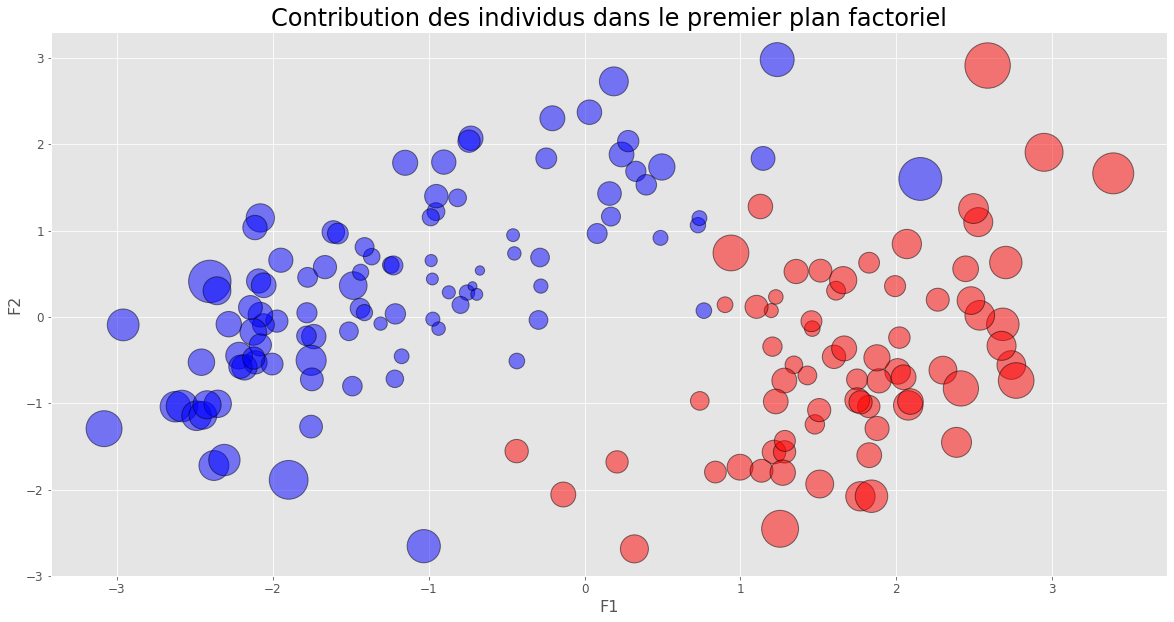

In [31]:
#Scatter Plot de la contribution des individus dans l'inertie totale
color = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=ctr_indiv_inertie['c_inertie']*100)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Contribution des individus dans le premier plan factoriel')

plt.savefig('p6_graphic/contribution_inertie.png')
plt.show()

*Il est judicieux de remarquer, du moins de prêter attention aux points dont la contribution est supérieure à la moyenne, car se sont ces individus qui permettent de donner un sens à l’axe. De plus, une contribution trop importante d’un des points à un axe doit être regardé avec prudence (~25% d’inertie).*

#### <span style="text-decoration:underline">Qualité de réprésentation des individus (COS2):<span/>

In [32]:
#Qualité de représentation des individus - COS2
cos2 = X_projected**2
n_comp = 2

for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
cos2_indiv = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'is_genuine': data['is_genuine']})
cos2_indiv

,COS2_1,COS2_2,is_genuine
0,0.251929,0.139000,True
1,0.818002,0.050822,True
2,0.784862,0.000466,True
3,0.882856,0.001652,True
4,0.320145,0.009417,True
...,...,...,...
165,0.800651,0.004703,False
166,0.324059,0.411824,False
167,0.498809,0.083461,False
168,0.156908,0.271800,False


*Lorsque l’angle est proche de 0, c'est-à-dire que le cosinus est proche de 1, l’individu est bien représenté.
Dans le cas inverse, l’angle est proche de 90° et le cosinusest proche de 0.*

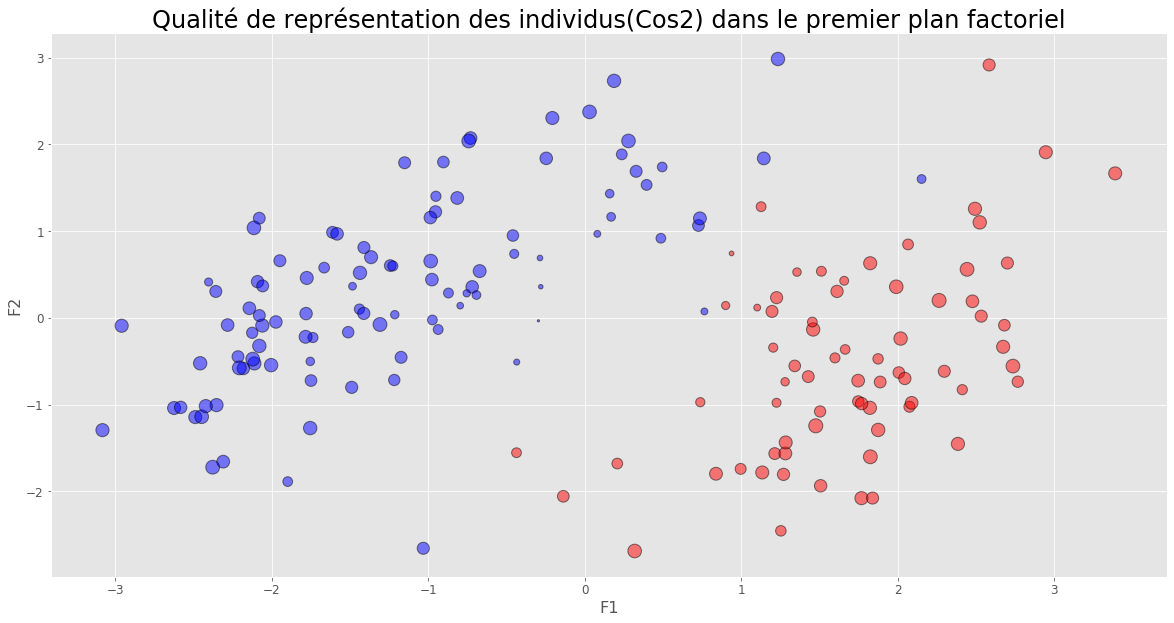

In [33]:
#Scatter Plot de la qualité de représentation des individus dans le 1er plan factoriel
cos2_indiv['COS2_1 + COS2_2'] = cos2_indiv['COS2_1'] + cos2_indiv['COS2_2']
colors = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=cos2_indiv['COS2_1 + COS2_2']*200)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Qualité de représentation des individus(Cos2) dans le premier plan factoriel')

plt.savefig('p6_graphic/qualite_representationcos2.png')
plt.show()

*Ce scatter plot sur le premier plan factoriel nous démontre que les individus sont relativement très bien représentés. En effet, un individu mal représenté sera proche de l'origine, avec par conséquent peu de contribution à la formation des axes étudiés. Ici, ce n'est pas le cas, on distingue parfaitement deux groupes d'individus, avec un large espace proche de l'origine.*

#### <span style="text-decoration:underline">Contribution des individus aux axes (CTR):<span/>

In [34]:
#Dimensions 
(n, p) = df.shape

#Calcul des valeurs propres à partir des valeurs singulières
eigval = pca.singular_values_**2/n

#Contribution aux axes
ctr = X_projected**2
for j in range(2):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
ctr_indiv = pd.DataFrame({'Billet':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
ctr_indiv

,Billet,CTR_1,CTR_2
0,0,0.009584,0.011426
1,1,0.009203,0.001236
2,2,0.008045,0.000010
3,3,0.008767,0.000035
4,4,0.011933,0.000759
...,...,...,...
165,165,0.012694,0.000161
166,166,0.013811,0.037927
167,167,0.008830,0.003193
168,168,0.001129,0.004227


*On relève, pour chaque axe, quels sont les individus qui ont la plus forte contribution à la formation de l'axe. 
Il est désormais facile de pouvoir déterminer les individus dont la contribution est supérieure pour donner un sens aux axes.*

[Retour vers la page notebook précédente (analyse univariée / bivariée)](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/p6_notebook01.ipynb)

[Suite du projet avec un algorithme de classification (Kmeans) et visualisation sur le premier plan factoriel de l'ACP](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/p6_notebook03.ipynb)